# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfQuick16 = pd.read_csv("CleanData/QuickClean-PC16.csv")

dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
dfQuick16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,1.623169,1.355042,0.104736,210.359,60.0,best,25000.0
1,1.573853,1.350586,0.090576,175.050,60.0,best,25000.0
2,1.521057,1.276001,0.093689,197.807,60.0,best,25000.0
3,1.693542,1.455139,0.098450,176.312,60.0,best,25000.0
4,1.491455,1.241211,0.095825,205.452,60.0,best,25000.0


In [2]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [3]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(calcMean(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfQuickMean16 = mean_of_dataset(dfQuick16)
dfQuickMean16.head()

<ipython-input-3-4b760d8289b5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.60822,1.3737,0.0954346,182.941,58.8601,25000,best
1,2.17316,1.87585,0.130221,227.23,61.4805,50000,best
2,2.70995,2.35067,0.16293,270.178,63.8333,75000,best
3,3.15281,2.73671,0.190366,312.32,66,100000,best
4,4.23995,3.68638,0.251734,416.208,67.1424,200000,best


In [4]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)


<ipython-input-3-4b760d8289b5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


In [5]:
dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfQuickMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.60822,1.3737,0.0954346,182.941,58.8601,25000,best
1,2.17316,1.87585,0.130221,227.23,61.4805,50000,best
2,2.70995,2.35067,0.16293,270.178,63.8333,75000,best
3,3.15281,2.73671,0.190366,312.32,66,100000,best
4,4.23995,3.68638,0.251734,416.208,67.1424,200000,best


In [6]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [7]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "quickbest"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfQuickMean16, dfReadMean16)




<ipython-input-7-12e6e9d6d1ec>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-7-12e6e9d6d1ec>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-7-12e6e9d6d1ec>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-7-12e6e9d6d1ec>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time 

# PLOTS

In [8]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10, markerfacecolor = "none")
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [9]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["best", "worst", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2
calcPercent(dfQuickMean16)
dfQuickMean16.head()

<ipython-input-6-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,1.60822,1.3737,0.0954346,182.941,58.8601,25000,best,-0.331812,-16.218296,-0.018143,85.417818,100,-0.349955,3.652410e+05,6.250000e+08
1,2.17316,1.87585,0.130221,227.23,61.4805,50000,best,-0.247428,-19.098049,-0.012175,86.318827,100,-0.259603,7.804820e+05,2.500000e+09
2,2.70995,2.35067,0.16293,270.178,63.8333,75000,best,-0.222986,-13.689185,-0.008496,86.741980,100,-0.231482,1.214595e+06,5.625000e+09
3,3.15281,2.73671,0.190366,312.32,66,100000,best,-0.136110,-2.647083,0.001457,86.802116,100,-0.134653,1.660964e+06,1.000000e+10
4,4.23995,3.68638,0.251734,416.208,67.1424,200000,best,0.074751,17.044631,0.026062,86.943995,100,0.100813,3.521928e+06,4.000000e+10


In [10]:
print(max(dfQuickMean16[dfQuickMean16["Input case"] == f"worst"]["Time - readCSV"]))

139416.64244496572


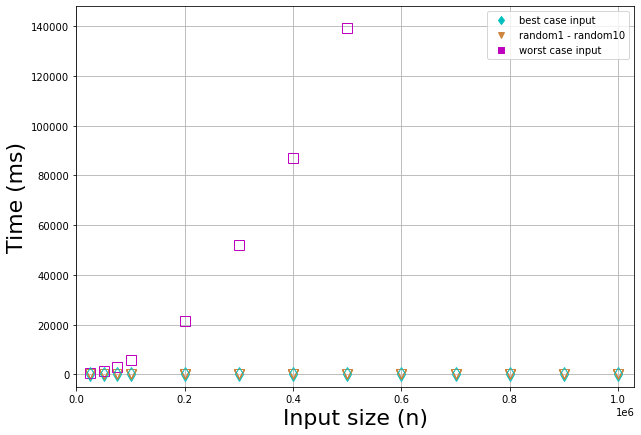

In [11]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(0,-11111110,"d", color="c",label="best case input")
plt.plot(0,-11111110,"v", color="peru",label="random1 - random10")
plt.plot(0,-11111110,"s", color="m",label="worst case input")

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v", regLine=False))
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s", regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d", regLine=False)

#for i in range(len(Rs)):
 #   print(f"random{i} R2", Rs[i][1], " \n")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Quick sort wall time vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-0.001, 1.03*10**6)
plt.ylim(-5000, 1.48*10**5)
plt.legend()
plt.show()


# SQ 2: Time vs. big-oh

worst R2  0.9995215031947976 



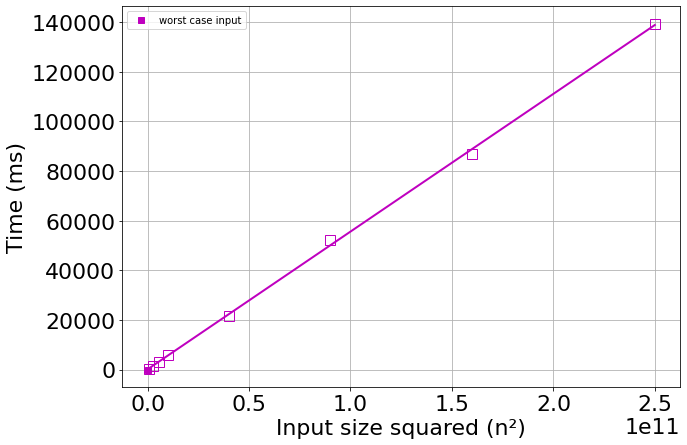

In [12]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s")

plt.plot(0,0,"s", color="m",label="worst case input")

print(f"worst R2 ", worst[1], "\n")

#plt.title("Quick sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.legend()
plt.show()


# E v. T

worst R2  0.9998954188741564 



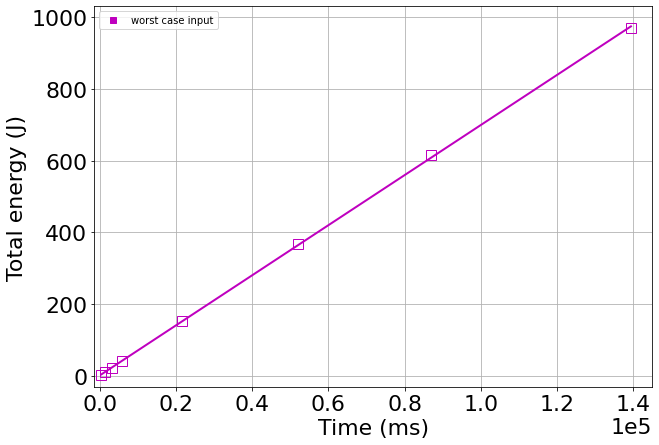

In [22]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")

plt.plot(-110000,-10000,"s", color="m",label="worst case input")

print(f"worst R2 ", worst[1], "\n")

#plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.xlim(-1500,1.45*10**5)
plt.ylim(-30, 1030)
plt.legend()
plt.grid()
plt.show()


# EC v. big-oh

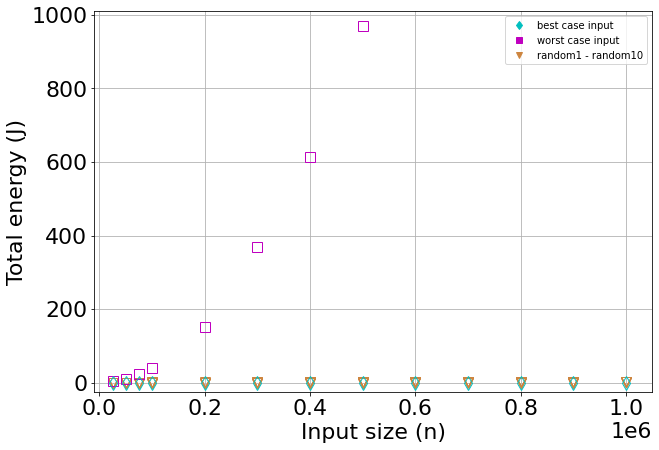

In [31]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(0000,-10000,"d", color="c",label="best case input")
plt.plot(0000,-10000,"s", color="m",label="worst case input")
plt.plot(0000,-10000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v",regLine=False))
worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=False)

#plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.legend()
plt.ylim(-25, 1010)
plt.xlim(-10000, 1050000)
plt.show()

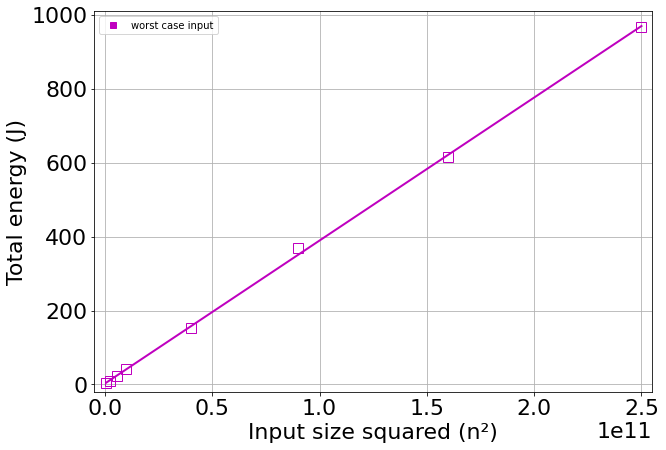

In [38]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")

plt.plot(-10000,-10000,"s", color="m",label="worst case input")
#print(f"worst R2 ", worst[1], "\n")

#plt.title("Quick sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.ylim(-20, 1010)
plt.xlim(-0.05*10**11, 2.55*10**11)
plt.legend()
plt.show()